In [35]:
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#### Load Google word2vec model

In [37]:
model_name = 'models/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(model_name, binary=True)

#### Load some sample vectors

In [38]:
dog_vector = model['dog']
cat_vector = model['cat']
king_vector = model['king']
banana_vector = model['banana']
apple_vector = model['apple']

PCA

In [39]:
X = np.vstack((dog_vector, cat_vector, king_vector, banana_vector, apple_vector))
print(X.shape)
pca = PCA(n_components=2)
result = pca.fit_transform(X)

(5, 300)


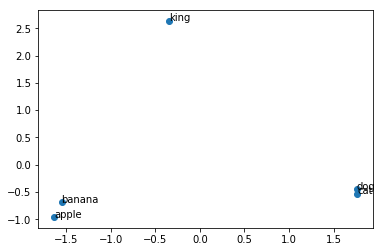

In [41]:
plt.scatter(result[:, 0], result[:, 1])
words = ['dog', 'cat', 'king', 'banana', 'apple']
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
#plt.savefig('wordvectors.png')
plt.show()